<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E7%B0%A1%E5%96%AE%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8/model_evaluation_%E8%96%AA%E8%B3%87_%E5%B9%B4%E8%B3%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 簡單線性迴歸模型評估

展示如何評估簡單線性迴歸模型的效能，包含：
1. R平方(R-squared)：解釋變異量
2. 均方誤差(MSE)：預測值與實際值的平均平方差
3. 平均絕對誤差(MAE)：預測值與實際值的平均絕對差
4. 殘差分析圖

In [ ]:
# 安裝 wget 套件
# wget 是一個用於從網路下載檔案的 Python 套件
# 在這個模型評估範例中，我們需要下載中文字型和薪資資料集
%%capture
%pip install wget

In [ ]:
# 下載模型評估所需的檔案
# 這個程式碼會下載中文字型和薪資資料集，用於後續的模型評估分析

import wget  # 匯入 wget 套件用於檔案下載

# 下載中文字型檔案
# 這個字型檔案用於在圖表中正確顯示中文字符，確保評估結果的可讀性
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

# 下載薪資資料集
# 這個 CSV 檔案包含年資和對應薪資的資料，用於建立和評估線性迴歸模型
wget.download('https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/Salary_Data.csv')

'Salary_Data.csv'

In [ ]:
# 匯入模型評估所需的套件
# 這個程式碼準備了進行模型評估和視覺化分析所需的所有工具

import numpy as np  # 數值計算套件
import pandas as pd  # 資料處理套件
from sklearn.linear_model import LinearRegression  # 線性迴歸模型
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # 評估指標套件
import matplotlib.pyplot as plt  # 基礎繪圖套件
import seaborn as sns  # 統計繪圖套件
import matplotlib as mpl  # matplotlib 設定模組
from matplotlib.font_manager import fontManager  # 字型管理器

# 設定中文字型
# 將下載的中文字型加入字型管理器，確保圖表中的中文能正確顯示
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 設定圖表風格
# 使用 ggplot 風格，讓圖表看起來更專業美觀
plt.style.use('ggplot')

In [ ]:
# 載入資料並建立線性迴歸模型
# 這個程式碼示範完整的機器學習工作流程：資料載入、模型訓練和預測

# 載入薪資資料集
data = pd.read_csv("Salary_Data.csv")

# 準備特徵和目標變數
# X 是特徵矩陣（年資），需要 reshape 為二維陣列以符合 scikit-learn 的要求
X = data["YearsExperience"].to_numpy().reshape(-1,1)
# y 是目標變數（薪資）
y = data["Salary"].to_numpy()

# 建立線性迴歸模型
# LinearRegression() 建立一個新的線性迴歸模型物件
model = LinearRegression()

# 訓練模型
# fit() 方法會根據提供的資料學習最佳的參數（斜率和截距）
model.fit(X, y)

# 進行預測
# 使用訓練好的模型對所有資料點進行預測，用於後續的模型評估
y_pred = model.predict(X)

## 模型評估指標

In [ ]:
# 計算模型評估指標
# 這個程式碼計算多種評估指標來全面評估線性迴歸模型的表現

# 計算 R² 分數（決定係數）
# R² 表示模型能解釋多少百分比的資料變異性，範圍 0-1，越接近 1 越好
r2 = r2_score(y, y_pred)

# 計算均方誤差（MSE）
# MSE 衡量預測值與實際值的平均平方差，數值越小表示預測越準確
mse = mean_squared_error(y, y_pred)

# 計算平均絕對誤差（MAE）
# MAE 衡量預測值與實際值的平均絕對差，單位與原始資料相同，容易理解
mae = mean_absolute_error(y, y_pred)

# 計算均方根誤差（RMSE）
# RMSE 是 MSE 的平方根，單位與原始資料相同，更容易解釋誤差大小
rmse = np.sqrt(mse)

# 顯示所有評估指標
print(f"R平方(R²) = {r2:.4f}")  # 顯示 R² 分數
print(f"均方誤差(MSE) = {mse:.2f}")  # 顯示均方誤差
print(f"均方根誤差(RMSE) = {rmse:.2f}")  # 顯示均方根誤差
print(f"平均絕對誤差(MAE) = {mae:.2f}")  # 顯示平均絕對誤差

R平方(R²) = 0.9583
均方誤差(MSE) = 32.41
均方根誤差(RMSE) = 5.69
平均絕對誤差(MAE) = 4.80


## 視覺化分析

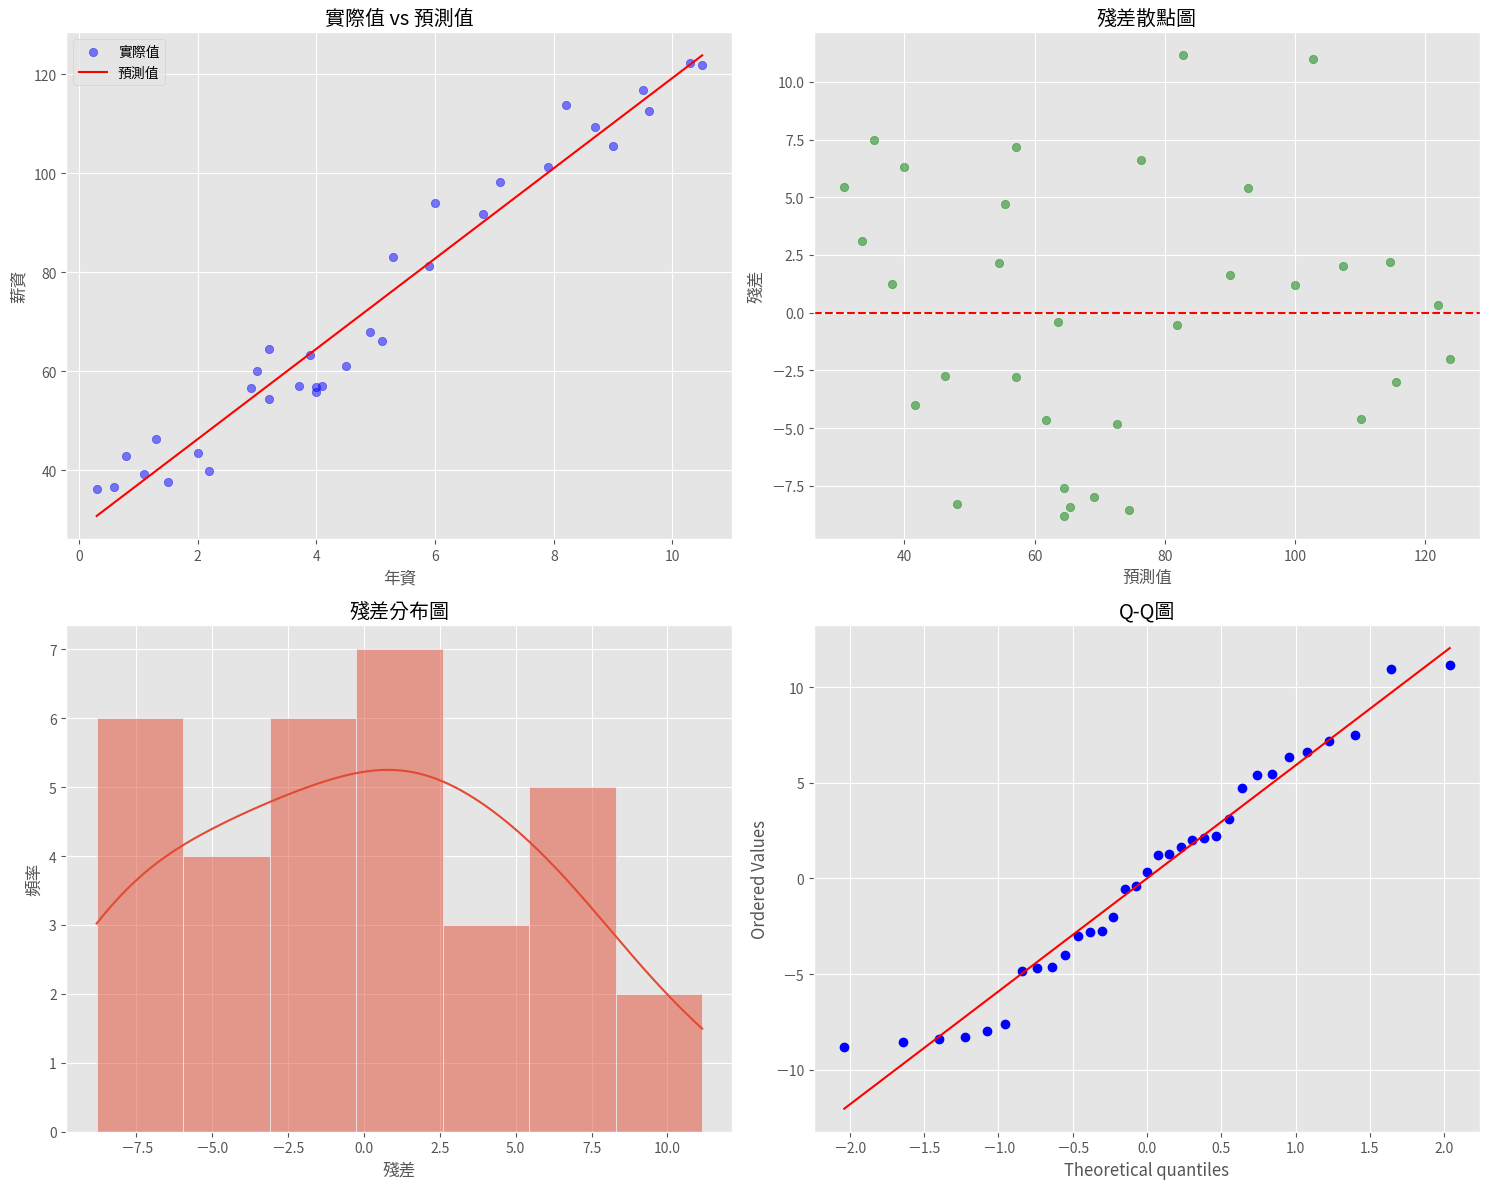

In [ ]:
# 建立模型評估的視覺化分析
# 這個程式碼創建一個 2x2 的子圖，展示四種不同的模型診斷圖表

# 建立一個 2x2 的子圖布局
# figsize=(15, 12) 設定圖表大小，確保所有圖表都能清楚顯示
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 實際值 vs 預測值散點圖
# 這個圖表顯示模型預測的準確性，點越接近紅色線表示預測越準確
axes[0,0].scatter(X, y, color='blue', alpha=0.5, label='實際值')  # 藍色點：實際資料
axes[0,0].plot(X, y_pred, color='red', label='預測值')  # 紅色線：模型預測
axes[0,0].set_xlabel('年資')  # X 軸標籤
axes[0,0].set_ylabel('薪資')  # Y 軸標籤
axes[0,0].set_title('實際值 vs 預測值')  # 圖表標題
axes[0,0].legend()  # 顯示圖例

# 2. 殘差散點圖
# 殘差 = 實際值 - 預測值，用來診斷模型的線性假設是否合理
residuals = y - y_pred  # 計算殘差
axes[0,1].scatter(y_pred, residuals, color='green', alpha=0.5)  # 綠色點：殘差散點
axes[0,1].axhline(y=0, color='red', linestyle='--')  # 紅色虛線：y=0 參考線
axes[0,1].set_xlabel('預測值')  # X 軸標籤
axes[0,1].set_ylabel('殘差')  # Y 軸標籤
axes[0,1].set_title('殘差散點圖')  # 圖表標題

# 3. 殘差分布圖
# 檢查殘差是否符合常態分布，這是線性迴歸的重要假設
sns.histplot(residuals, kde=True, ax=axes[1,0])  # 使用 seaborn 繪製直方圖和密度曲線
axes[1,0].set_xlabel('殘差')  # X 軸標籤
axes[1,0].set_ylabel('頻率')  # Y 軸標籤
axes[1,0].set_title('殘差分布圖')  # 圖表標題

# 4. Q-Q 圖（分位數-分位數圖）
# 用來檢驗殘差是否符合常態分布，點越接近對角線表示越符合常態分布
from scipy import stats  # 匯入 scipy 統計模組
qq = stats.probplot(residuals, dist="norm", plot=axes[1,1])  # 繪製 Q-Q 圖
axes[1,1].set_title('Q-Q圖')  # 圖表標題

# 調整子圖間距並顯示圖表
plt.tight_layout()  # 自動調整子圖間距，避免重疊
plt.show()  # 顯示圖表

# 說明1:R平方分數(R² Score)的功能與意義:

**R平方分數的主要功用**

- R平方(R²)是一個介於0到1之間的數值，用來衡量迴歸模型的預測效果
- 它告訴我們模型能解釋多少百分比的資料變異性(請參考說明2)

**數值的意義:**

- R² = 1: 完美預測,模型解釋了100%的變異
- R² = 0: 模型的預測不比直接用平均值更好
- R² < 0: 模型預測效果比用平均值還差

**以您目前的薪資預測模型為例:**

- 如果R² = 0.95,表示:
    - 模型可以解釋95%的薪資變異
    - 表示年資與薪資之間有很強的線性關係
    - 這是一個很好的擬合結果

**使用時機**

- 用於評估迴歸模型的整體表現
- 比較不同模型的預測效果
- 判斷特徵(如年資)是否能良好解釋目標變數(如薪資)的變化

# 說明2-什麼是資料變異性？
資料變異性是指數據點與平均值之間的差異程度。簡單來說，就是數據分散的程度。

**➜實際例子**

假設我們有以下薪資數據：

|姓名|薪資|
|--|--|
|小明|30,000|
|小華|32,000|
|小美|31,000|
|小強|45,000|
|小菁|32,000|

**➜分析:**

1. 低變異性的例子
    - 果去掉小強，其他人的薪資都在 30,000-32,000 之間
    - 這就是低變異性，數據很集中

2. 高變異性的例子
    - 加入小強的 45,000 後，數據變得比較分散
    - 這就形成了高變異性

---

#### R平方與變異性的關係

**如果 R² = 0.95，表示**  
    - 模型可以解釋 95% 的薪資變化
    - 只有 5% 的變異是模型無法解釋的

---

#### 視覺化理解

想像一張散點圖:

- 點越集中在一條線上 = 低變異性 = 較高的 R²
- 點越分散 = 高變異性 = 較低的 R²

這就像是在觀察：「年資越高，薪資是否真的越高？」的關係程度。

# 說明3- MSE(均方誤差)說明
##### 1. 為什麼叫「均方誤差」

名稱由三個部分組成:

- 均:平均值
- 方:平方
- 誤差:預測值與實際值的差距

##### 2. 評估功能
- **計算方式**: `MSE = (1/n) * Σ(y實際 - y預測)²`
- **目的**:
    - 評估預測值與實際值的差距大小
    - 通過平方放大較大的誤差
    - **結果越小代表模型預測越準確**


##### 3. 範例說明

```
# 假設我們預測3個學生的成績:
實際成績 = [85, 90, 95]
預測成績 = [80, 88, 98]

# 計算MSE步驟:
1. 計算差距: [5, 2, -3]
2. 平方: [25, 4, 9]  
3. 平均: (25 + 4 + 9) / 3 = 12.67

MSE = 12.67
```


# 說明4-MAE (平均絕對誤差) 說明

### 1. 為什麼叫MAE

MAE 是 "Mean Absolute Error" 的縮寫：
- Mean (平均)
- Absolute (絕對值)
- Error (誤差)

### 2. 評估目的
- 衡量模型預測值與實際值之間的平均誤差大小
- 使用絕對值來計算誤差，所以誤差單位與原始數據一致
- 計算公式：`MAE = (1/n) * Σ|y實際 - y預測|`

### 3. 簡單範例
假設我們在預測學生的考試成績：

```
# 實際成績
y實際 = [85, 90, 95]

# 模型預測成績
y預測 = [87, 88, 98]

# 計算絕對誤差
|85-87| = 2
|90-88| = 2
|95-98| = 3

# MAE計算
MAE = (2 + 2 + 3) / 3 = 2.33
```
這表示模型預測的成績平均會差 2.33 分。MAE 的優點是結果容易理解，因為單位與原始數據相同。

# 說明5-RMSE (均方根誤差)

#### 1. 為什麼叫RMSE?  
RMSE (Root Mean Squared Error) 名稱由三個部分組成:

- Root: 根號 (開根號)
- Mean: 平均
- Squared Error: 平方誤差

#### 2. 評估功能
- 衡量模型預測值與實際值之間的平均誤差大小
- 公式: RMSE = √((1/n) * Σ(y實際 - y預測)²)
- 單位與原始數據相同，更容易解釋

#### 3. 和 MSE 的主要差別
**➜MSE (均方誤差):**
- 單位是原始數據的平方 (例如: 薪資²)
- 不容易直觀理解誤差大小

**➜RMSE (均方根誤差):**
- 透過開根號，把單位轉回原始數據單位 (例如: 薪資)
- 更容易解釋預測誤差的實際意義

#### 4. 簡單範例

```
# 假設在預測薪資
實際薪資 = [30000, 35000, 40000]
預測薪資 = [32000, 34000, 38000]

# 計算MSE步驟
1. 計算差距平方: [(32000-30000)², (34000-35000)², (38000-40000)²]
2. 平均: MSE = 4,000,000

# 計算RMSE
RMSE = √4,000,000 = 2,000

# 解釋:平均預測誤差約2,000元
```

# 說明6- 殘差散點圖說明

殘差散點圖是評估迴歸模型的重要診斷工具,這段程式碼主要包含以下步驟:

- **殘差 = 實際值 - 預測值**
- 用來表示模型預測值與實際值的差距

**如果模型表現良好,殘差應該:**

- 隨機分布在y=0線的上下
- 沒有明顯的模式或趨勢
- 大致呈現均勻的分散程度

**透過這個圖表可以協助我們判斷:**

- 線性假設是否合理
- 是否存在異常值
- 誤差是否具有等分散性


# 說明7-殘差分布圖

**主要觀察重點**

1. **常態分配檢視**
    - 觀察殘差是否呈鐘形曲線分布
    - 是否左右對稱且集中在0附近
    - KDE曲線(核密度估計)是否呈現平滑的鐘形

2. **異常值偵測**
    - 檢查是否有極端值或離群值
    - 分布的尾部是否過長或不對稱

**解讀意義**

- 如果殘差呈現近似常態分布:
    - 表示線性迴歸模型的假設條件大致符合
    - 預測誤差是隨機的,沒有系統性偏差
- 如果分布不符合常態:
    - 可能需要考慮資料轉換
    - 或使用其他非線性模型
    - 或檢查是否遺漏重要變數

# 說明8-(Quantile-Quantile Plot)

**這是一種用來檢驗數據是否符合常態分布的圖形工具。**

**使用目的**  

- 檢驗數據是否呈常態分布  
- 若數據點落在對角線上，表示數據符合常態分布  
- 偏離對角線則表示數據分布異常 